In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


%matplotlib inline

LOWEST_YEAR = 1988 # This is the lowest year available in Dataset
HIGHEST_YEAR = 2016 # This is the highest year available in Dataset
START_YEAR = 2000
END_YEAR = 2017 # We're using 2017 because range() functions are exclusive for the last value

In [2]:
data = pd.read_csv('./commodity_trade_statistics_data.csv')

/Users/mihailojoksimovic/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
is_export = data['flow'] == 'Export'
is_import = data['flow'] == 'Import'
is_live_animals = data['category'] == '01_live_animals'

country_summary_data = data[(data['country_or_area'] == 'USA') & is_export & is_live_animals][['year', 'trade_usd']].groupby('year').sum()

In [4]:
X_df = country_summary_data[['trade_usd']]

In [5]:
X_df['trade_usd'] = X_df['trade_usd'].astype('float')

In [6]:
X_df.head(5)

,trade_usd
year,
1991,692654489.0
1992,637981181.0
1993,522006551.0
1994,590751118.0
1995,544131807.0


In [7]:
X_df.rename(columns={'trade_usd': 'Y'}, inplace=True)

In [8]:
X_df.head(5)

,Y
year,
1991,692654489.0
1992,637981181.0
1993,522006551.0
1994,590751118.0
1995,544131807.0


In [9]:
X_df['X_1'] = X_df['Y'].shift(1)
X_df['X_2'] = X_df['Y'].shift(2)

In [10]:
X_df.head(5)

,Y,X_1,X_2
year,,,
1991,692654489.0,NaN,NaN
1992,637981181.0,692654489.0,NaN
1993,522006551.0,637981181.0,692654489.0
1994,590751118.0,522006551.0,637981181.0
1995,544131807.0,590751118.0,522006551.0


In [11]:
# Prepare the input data



In [12]:
from sklearn.preprocessing import MinMaxScaler

# Prepare the data for training ...
X = X_df.dropna()

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [13]:
X

array([[0.00482798, 0.17772777, 0.25923701],
       [0.10731523, 0.00482798, 0.17772777],
       [0.03781323, 0.10731523, 0.00482798],
       [0.02414053, 0.03781323, 0.10731523],
       [0.26149757, 0.02414053, 0.03781323],
       [0.24497671, 0.26149757, 0.02414053],
       [0.20759766, 0.24497671, 0.26149757],
       [0.51527113, 0.20759766, 0.24497671],
       [0.56466948, 0.51527113, 0.20759766],
       [0.18367694, 0.56466948, 0.51527113],
       [0.40723433, 0.18367694, 0.56466948],
       [0.        , 0.40723433, 0.18367694],
       [0.22719499, 0.        , 0.40723433],
       [0.35199619, 0.22719499, 0.        ],
       [0.34356531, 0.35199619, 0.22719499],
       [0.5079816 , 0.34356531, 0.35199619],
       [0.41449247, 0.5079816 , 0.34356531],
       [0.44147089, 0.41449247, 0.5079816 ],
       [0.77446718, 0.44147089, 0.41449247],
       [1.        , 0.77446718, 0.44147089],
       [0.74654904, 1.        , 0.77446718],
       [0.63456042, 0.74654904, 1.        ],
       [0.

In [14]:
train = X[:-3]
test = X[-3:]

X_train = train[:, 1:]
Y_train = train[:, 0]

X_test = test[:, 1:]
Y_test = test[:, 0]

# Linear regression (won't work for sure but let's just try for sake of trying)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [49]:
model = LinearRegression(fit_intercept=True)

In [50]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     0.6114634421856651
Model intercept: 0.0907639373977423


In [52]:
predicted = model.predict(X_train)

In [53]:
predicted

array([0.25524796, 0.1319783 , 0.15742267, 0.13698877, 0.11366563,
       0.25585725, 0.29685489, 0.27044227, 0.45052617, 0.54696912,
       0.32464086, 0.37931584, 0.17843561, 0.22968537, 0.35490854,
       0.37662127, 0.47534077, 0.45357204, 0.4499415 , 0.65936462,
       0.86895899])

In [54]:
mean_squared_error(Y_train, predicted)

0.035755071757392606

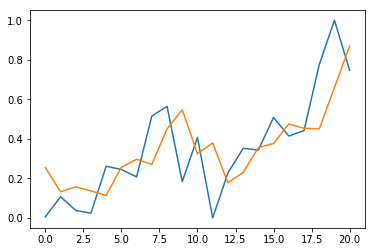

In [55]:
plt.plot(range(len(Y_train)), Y_train)
plt.plot(range(len(Y_train)), predicted)

In [56]:
test_predicted = model.predict(X_test)

In [58]:
mean_squared_error(Y_test, test_predicted)

0.033109687356271296

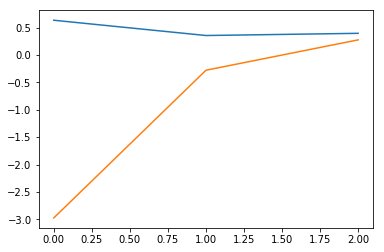

In [81]:
plt.plot(range(len(Y_test)), Y_test)
plt.plot(range(len(Y_test)), test_predicted)

# Try with polynomial features

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
poly = PolynomialFeatures(3)

In [72]:
X_train_poly_features = poly.fit_transform(X_train)
X_test_poly_features = poly.fit_transform(X_test)

In [73]:
X_train_poly_features.shape

(21, 10)

In [74]:
model2 = LinearRegression(fit_intercept=True)
model2.fit(X_train_poly_features, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
predicted = model2.predict(poly.transform(X_train))

In [76]:
mean_squared_error(Y_train, predicted)

0.024646380352249024

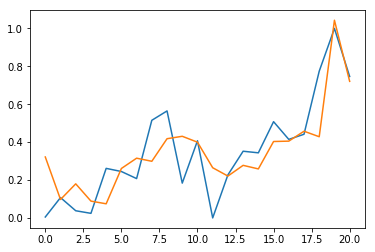

In [77]:
plt.plot(range(len(Y_train)), Y_train)
plt.plot(range(len(Y_train)), predicted)

In [78]:
test_predicted = model2.predict(X_test_poly_features)

In [79]:
mean_squared_error(Y_test, test_predicted)

4.481784014349719

# Let's make a little bit of fun ... Let's try SVM

In [82]:
from sklearn.svm import LinearSVR

In [84]:
model = LinearSVR(random_state=0)

In [85]:
model.fit(X_train, Y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=0, tol=0.0001, verbose=0)

In [88]:
predicted = model.predict(X_train)

In [89]:
mean_squared_error(Y_train, predicted)

0.03772471426983313

In [90]:
test_predicted = model.predict(X_test)

In [91]:
mean_squared_error(Y_test, test_predicted)

0.018883744054398174

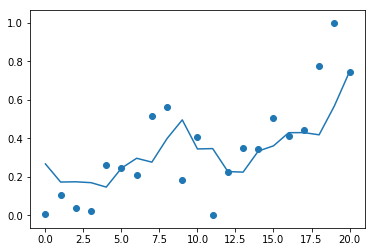

In [97]:
plt.scatter(range(len(Y_train)), Y_train)
plt.plot(range(len(Y_train)), model.predict(X_train))

In [98]:
type(Y_train)

numpy.ndarray

In [99]:
# Try plotting both the train and test data

In [115]:
train_and_test_data = np.append(Y_train, Y_test)

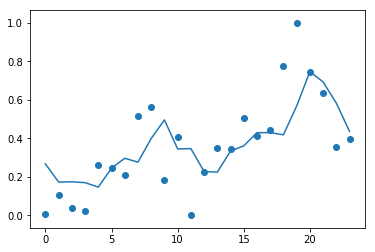

In [142]:
plt.scatter(range(len(train_and_test_data)), train_and_test_data)
plt.plot(range(len(train_and_test_data)), model.predict(np.append(X_train, X_test, axis=0)))

In [132]:
X_train.shape

(21, 2)

In [141]:
model.predict(np.append(X_train, X_test, axis=0))

array([0.26688226, 0.17267357, 0.17396996, 0.16945006, 0.14645196,
       0.24481952, 0.29626473, 0.27616921, 0.39883124, 0.49586992,
       0.34474463, 0.34662489, 0.22719499, 0.22416384, 0.33367855,
       0.3608378 , 0.4292331 , 0.42970177, 0.4182134 , 0.56759863,
       0.74637826, 0.69335198, 0.58285506, 0.43571431])